# Load libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\cheta\OneDrive\Documents\1 Python (AI_ML)\1project dataset\3 health_data.csv')

# Understand dataset

In [5]:
df.shape

(55500, 15)

In [6]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [7]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
df.duplicated().sum()

534

In [9]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [10]:
df.head(6)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal


# clean data

In [12]:
df=df.drop_duplicates().reset_index(drop=True)

In [13]:
df['Gender']=df['Gender'].astype('category')
df['Blood Type']=df['Blood Type'].astype('category')

In [14]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])

In [15]:
df['Billing Amount']=df['Billing Amount'].astype('int')

In [16]:
df['Blood Type']=df['Blood Type'].astype('category')

# Detect outliers in Billing Amount

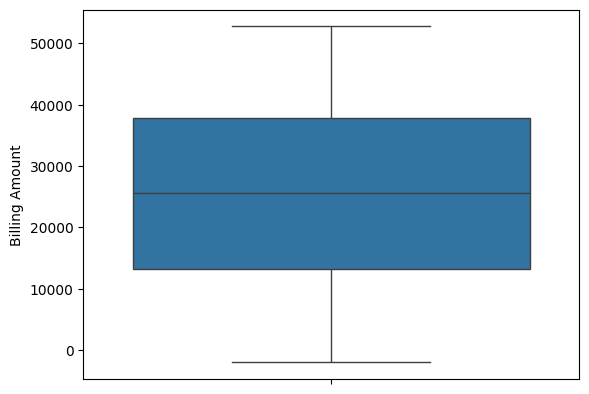

In [18]:
sns.boxplot(data=df,y='Billing Amount');

Text(0.5, 1.0, 'Decect Outliers in Column')

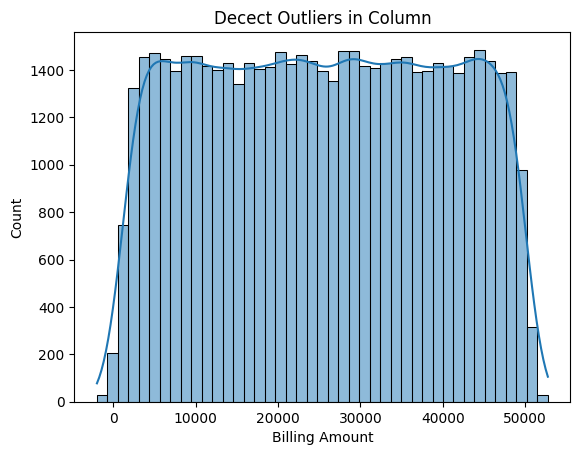

In [19]:
sns.histplot(data=df,x='Billing Amount',kde=True);
plt.title('Decect Outliers in Column')

#### There is not have any outliers

# Correlation for numerical features.

<Axes: >

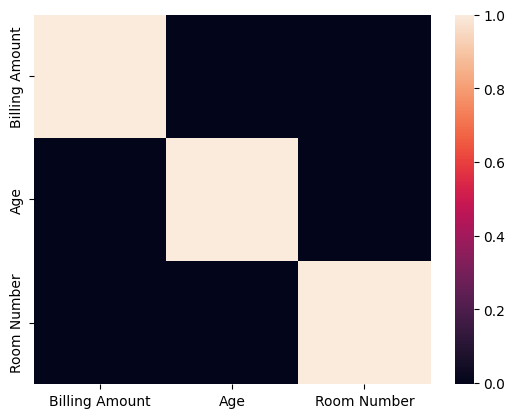

In [22]:
data=df[['Billing Amount','Age']].corr

data
sns.heatmap(df[['Billing Amount','Age','Room Number']].corr())

#### No linear correlation between numeric columns

Billing Amount and Age

Room Number and Age

Room Number and Billing Amount

# EDA

## EDA--> Which Gender have more Disease

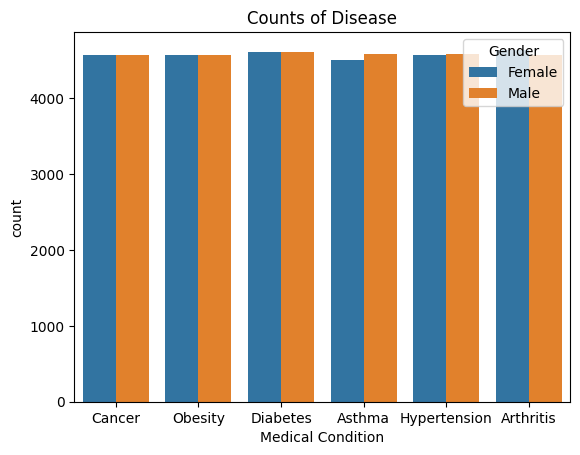

In [26]:
sns.countplot(data=df,x='Medical Condition',hue='Gender');
plt.title('Counts of Disease')
plt.show()

In [27]:
Medical_by_Gender=df.groupby(['Medical Condition','Gender'],observed=True).size().reset_index(name='Count')
Medical_by_Gender

,Medical Condition,Gender,Count
0,Arthritis,Female,4642
1,Arthritis,Male,4576
2,Asthma,Female,4511
3,Asthma,Male,4584
4,Cancer,Female,4566
5,Cancer,Male,4574
6,Diabetes,Female,4609
7,Diabetes,Male,4607
8,Hypertension,Female,4569
9,Hypertension,Male,4582


In [28]:
(df['Medical Condition']=='Asthma').sum()

9095

In [29]:
print((df['Gender']=='Female').sum())
print((df['Gender']=='Male').sum())

27470
27496


#### Here is almost same numbers of diseases in gender category but Arthritis was most common

## EDA-->I create a column called Age_range to find which age group have more diseases

In [32]:
df['Age'].max()

89

In [33]:
bins=[0,18,35,50,65,75,90]
lables=['0-18','19-35','36-50','51-65','65-75','76+']
rng=pd.cut(df['Age'],labels=lables,bins=bins)
# print(rng)
df.insert(2,value=rng,column='Age range')

In [34]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [35]:
df.head(6)

,Name,Age,Age range,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,19-35,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,51-65,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,76+,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,19-35,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,36-50,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,36-50,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145,389,Urgent,2023-12-24,Ibuprofen,Normal


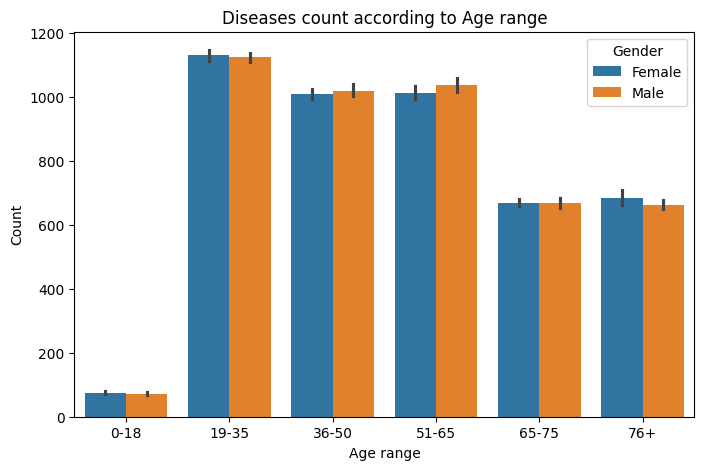

In [36]:
plt.figure(figsize=(8,5))
count_df=df.groupby(['Age range','Gender','Medical Condition'],observed=True).size().reset_index(name="Count")
sns.barplot(data=count_df,x='Age range',y='Count',hue='Gender')
plt.title('Diseases count according to Age range');

#### Age groups (19-35 ,36-50 , 51-65) have more Diseases ,or the 0-18 age group fewer diseses then other categories.

# EDA--> Which Age category have more Disease 

In [39]:
my=df.groupby(['Medical Condition','Age range'],observed=True).size().reset_index(name='count_diseases')

Text(0.5, 1.0, 'types of Diseases')

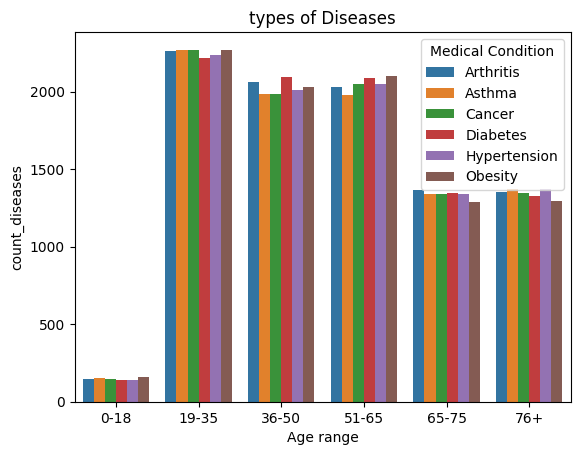

In [40]:
sns.barplot(data=my,x='Age range',y='count_diseases',hue='Medical Condition')
plt.title('types of Diseases')

#### The number of different diseases are same in every age group

# EDA--> To 10 hospitals that generate more bill

In [43]:
df['Hospital'].nunique()

39876

In [44]:
earnings=df.groupby(['Hospital','Gender'],observed=True)['Billing Amount'].sum().sort_values(ascending=False).reset_index(name='sum').head(10)

In [45]:
earnings.head(10)

,Hospital,Gender,sum
0,Ltd Smith,Female,831999
1,Smith PLC,Female,664390
2,LLC Smith,Male,646124
3,Johnson PLC,Male,637486
4,Smith Ltd,Female,539219
5,PLC Williams,Female,538205
6,Johnson Inc,Male,523792
7,Group Smith,Male,520358
8,Smith Inc,Female,517872
9,Inc Brown,Female,512041


Text(0.5, 1.0, 'Revinue of Hospitals')

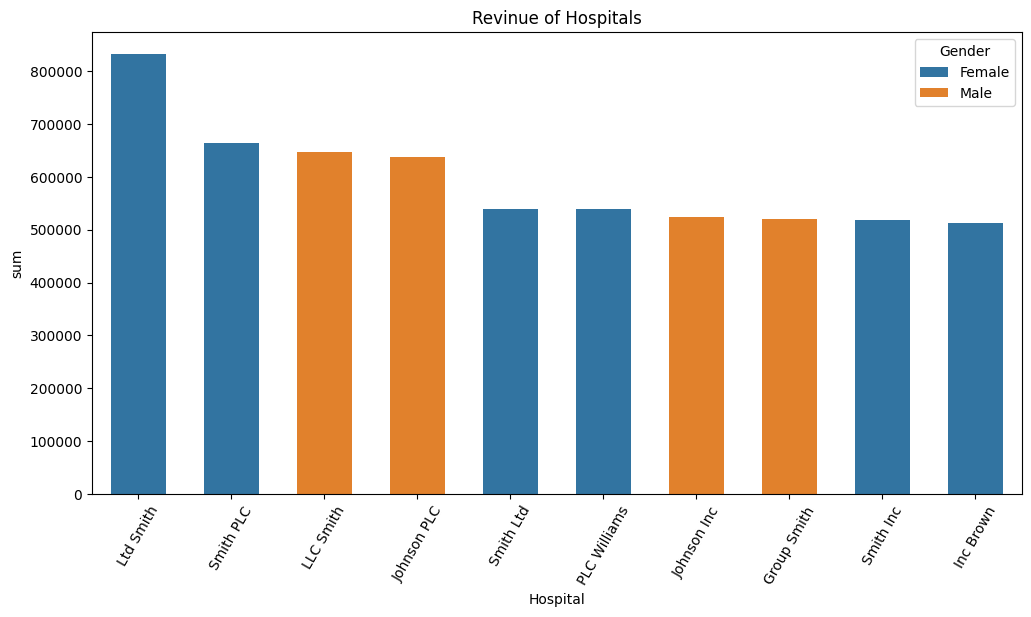

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(earnings,x='Hospital',y='sum',hue='Gender',width=0.6,);
plt.xticks(rotation=60);
plt.title('Revinue of Hospitals')

#### The highest bill pay by Female then male in hospiltals, that hosplitals are 'Ltd smith','Smith PLC' etc.

# EDA--> Total bill according to Emergency,urgent,Elective

In [49]:
admi_type_bill=df.groupby(['Admission Type'],observed=True)['Billing Amount'].sum().sort_values(ascending=False).reset_index(name='Bill')
admi_type_bill

,Admission Type,Bill
0,Elective,473123917
1,Urgent,469228564
2,Emergency,461688511


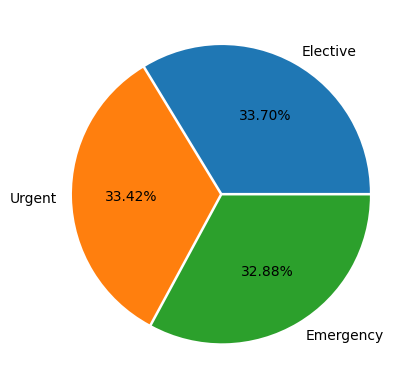

In [50]:
plt.pie(x=admi_type_bill['Bill'],labels=admi_type_bill['Admission Type'],autopct='%.2f%%',explode=[.01,.01,.01]);

# EDA--> Gender Distribution

In [52]:
my_temp=df.groupby(['Blood Type','Gender'],observed=True).size().reset_index(name='Distribution')

In [53]:
my_temp

,Blood Type,Gender,Distribution
0,A+,Female,3534
1,A+,Male,3362
2,A-,Female,3418
3,A-,Male,3480
4,AB+,Female,3407
5,AB+,Male,3475
6,AB-,Female,3428
7,AB-,Male,3446
8,B+,Female,3348
9,B+,Male,3537


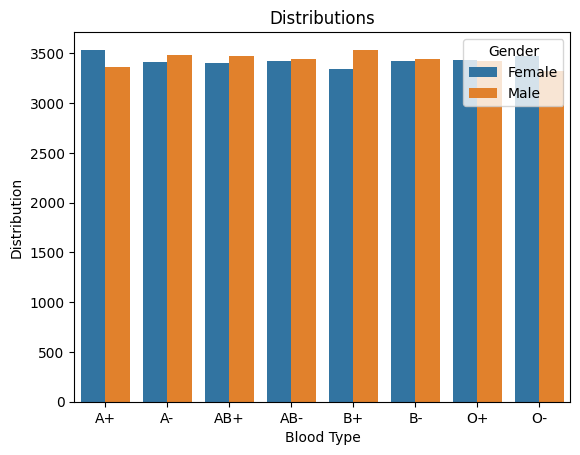

In [54]:
sns.barplot(data=my_temp,x='Blood Type',y='Distribution',hue='Gender')
plt.title('Distributions');

#### Gender distribution is equal for each Blood Type.

# What is the minimum and maximum time to take discharge 

In [57]:
import time

In [58]:
df['D/W days']=(df['Discharge Date']-df['Date of Admission']).dt.days
df['D/W days']=df['D/W days'].sort_values(ascending=True).reset_index(drop=True)

In [59]:
print("minimum days",df['D/W days'].min())
print('maximum days',df['D/W days'].max())

minimum days 1
maximum days 30


# Conclusion
1. Age groups (19-35 ,36-50 , 51-65) have more Diseases ,or the 0-18 age group fewer diseses then other categories.

2. The number of different diseases are same in every age group

3. Here is almost same numbers of diseases in gender category but Arthritis was most common

4. The highest bill pay by Female then male in hospiltals, that hosplitals are 'Ltd smith','Smith PLC' etc.

5. Gender distribution is equal for each Blood Type.